## **Import Needed Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder , StandardScaler ,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

print("loaded modules")

loaded modules


## **EDA**

### Read Data

In [2]:
df=pd.read_csv('/kaggle/input/student-dropout/student_dropout.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
count_target=df['Target'].value_counts()
count_target

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

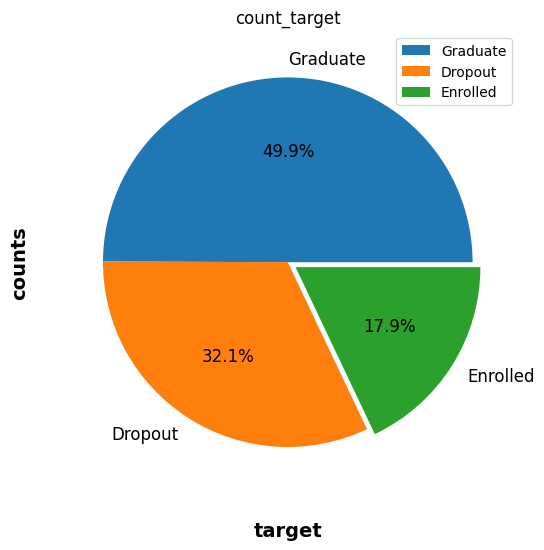

In [6]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
count_target.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('count_target')
plt.xlabel('target', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", fontsize = 14, labelpad = 20)
plt.legend(labels = count_target.index, loc = "best")
plt.show()

In [7]:
gender_count=df['Gender'].value_counts()
gender_count

Gender
0    2868
1    1556
Name: count, dtype: int64

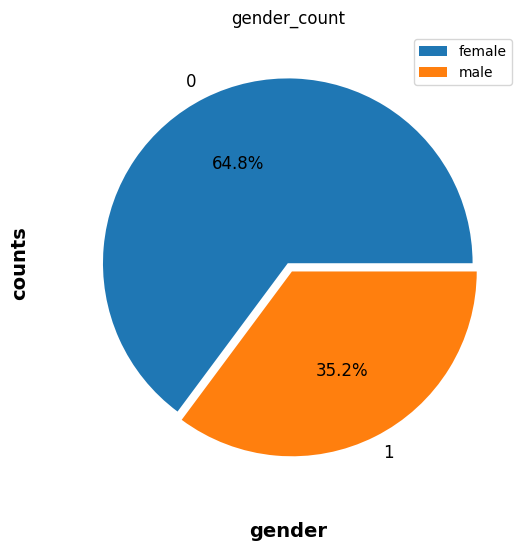

In [8]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
gender_count.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('gender_count')
plt.xlabel('gender', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", fontsize = 14, labelpad = 20)
plt.legend(labels = ["female",'male'], loc = "best")
plt.show()

In [9]:
count_displace=df['Displaced'].value_counts()
count_displace

Displaced
1    2426
0    1998
Name: count, dtype: int64

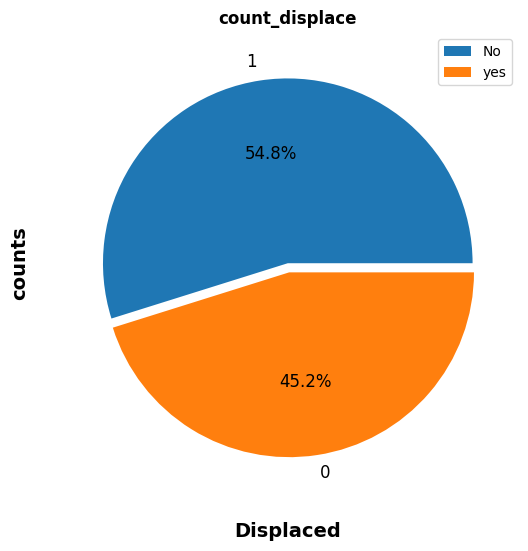

In [10]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
count_displace.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('count_displace',weight = "bold")
plt.xlabel('Displaced', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", fontsize = 14, labelpad = 20)
plt.legend(labels = ['No','yes'], loc = "best")
plt.show()

In [11]:
count_educationspecial=df['Educational special needs'].value_counts()
count_educationspecial

Educational special needs
0    4373
1      51
Name: count, dtype: int64

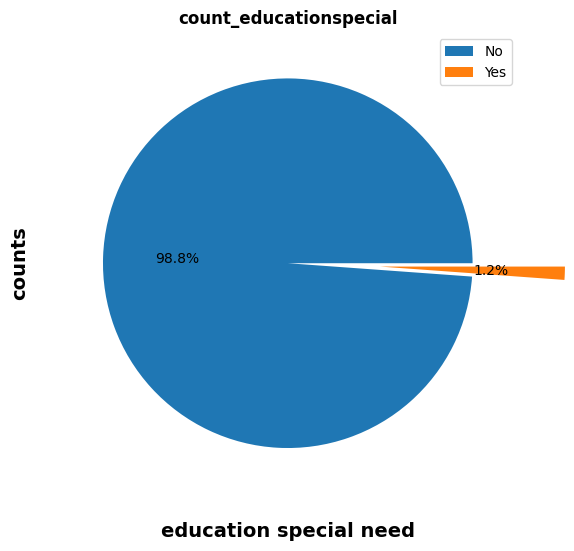

In [12]:
plt.figure(figsize = (20, 6))
explode = (0,0.5)
plt.pie(count_educationspecial, explode = explode, autopct = '%.1f%%')
plt.title('count_educationspecial',weight = "bold")
plt.xlabel('education special need', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", fontsize = 14, labelpad = 20)
plt.legend(labels = ['No', 'Yes'], loc = "best")
plt.show()

In [13]:
count_fees=df['Tuition fees up to date'].value_counts()
count_fees

Tuition fees up to date
1    3896
0     528
Name: count, dtype: int64

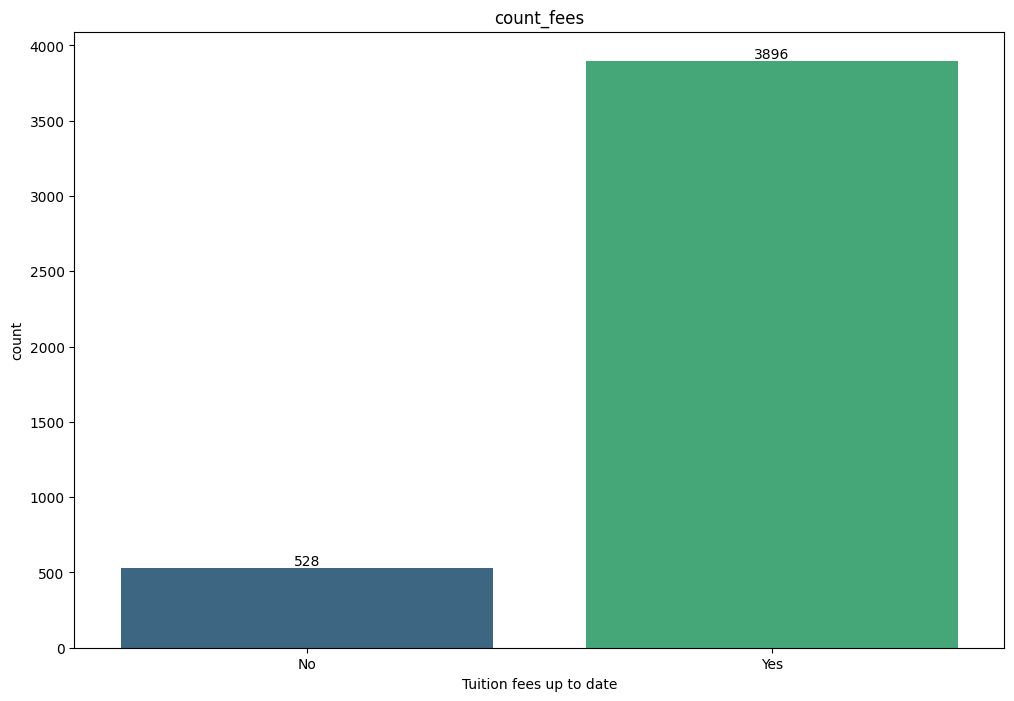

In [14]:
plt.figure(figsize=(12,8))
M=sns.barplot(x=count_fees.index,y=count_fees.values,palette='viridis')
M.bar_label(M.containers[0], fontsize=10);
plt.title('count_fees')
plt.xlabel('Tuition fees up to date')
plt.ylabel('count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [15]:
count_Scholarship= df['Scholarship holder'].value_counts()
count_Scholarship

Scholarship holder
0    3325
1    1099
Name: count, dtype: int64

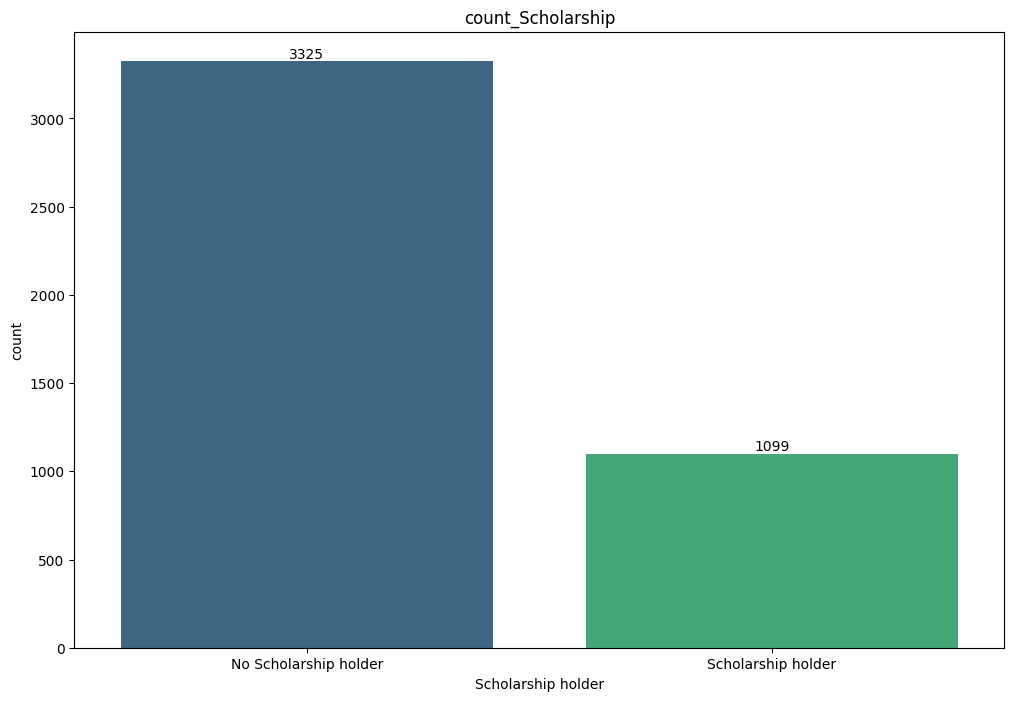

In [16]:
plt.figure(figsize=(12,8))
M=sns.barplot(x=count_Scholarship.index,y=count_Scholarship.values,palette='viridis')
M.bar_label(M.containers[0], fontsize=10);
plt.title('count_Scholarship')
plt.xlabel('Scholarship holder')
plt.ylabel('count')
plt.xticks([0, 1], ['No Scholarship holder', 'Scholarship holder'])
plt.show()

In [17]:
count_Debtor=df['Debtor'].value_counts()
count_Debtor

Debtor
0    3921
1     503
Name: count, dtype: int64

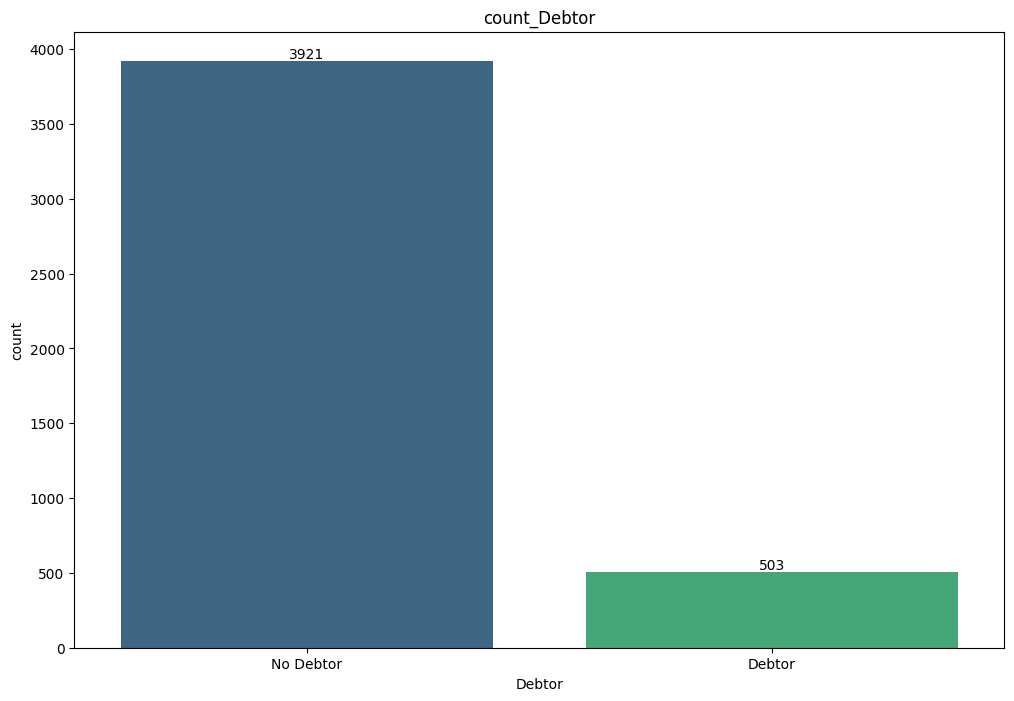

In [18]:
plt.figure(figsize=(12,8))
M=sns.barplot(x=count_Debtor.index,y=count_Debtor.values,palette='viridis')
M.bar_label(M.containers[0], fontsize=10);
plt.title('count_Debtor')
plt.xlabel('Debtor')
plt.ylabel('count')
plt.xticks([0, 1], ['No Debtor', 'Debtor'])
plt.show()

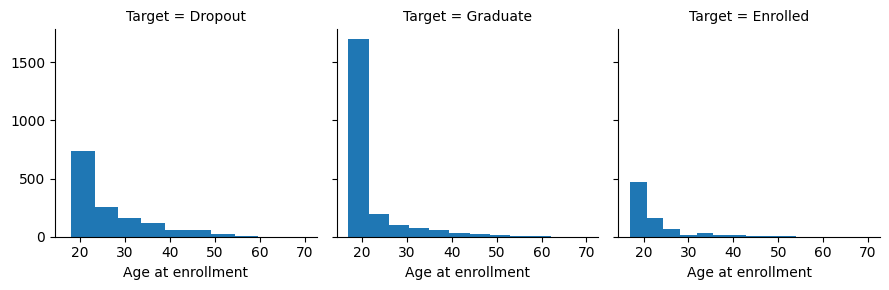

In [19]:
age=sns.FacetGrid(df,col='Target')
age.map(plt.hist,'Age at enrollment')

In [20]:
count_International=df['International'].value_counts()
count_International

International
0    4314
1     110
Name: count, dtype: int64

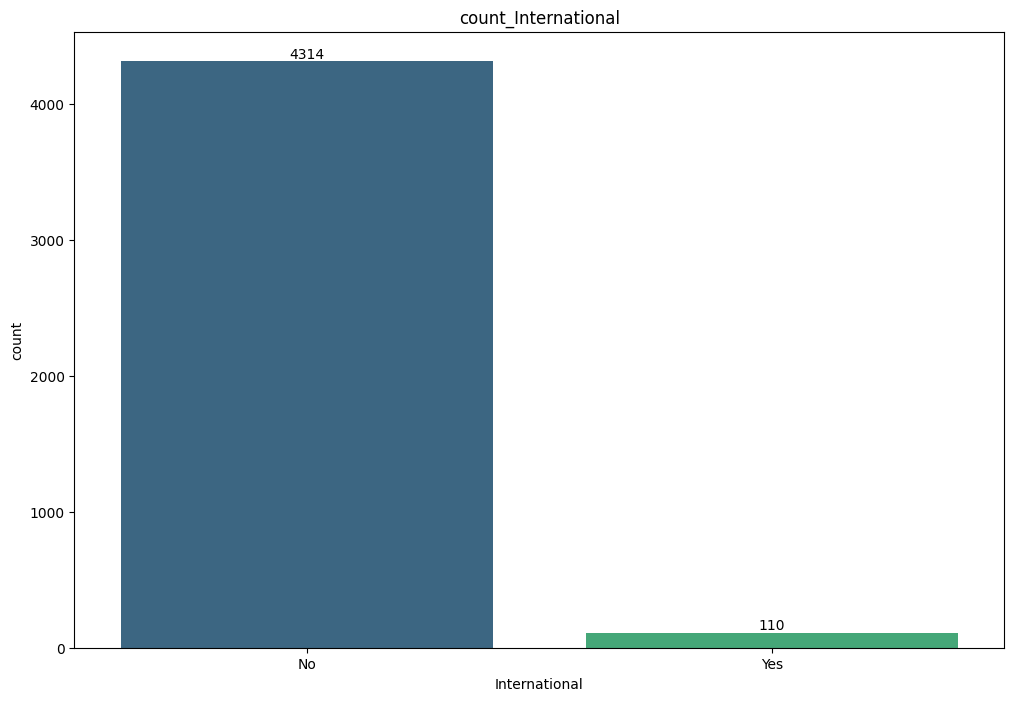

In [21]:
plt.figure(figsize=(12,8))
M=sns.barplot(x=count_International.index,y=count_International.values,palette='viridis')
M.bar_label(M.containers[0], fontsize=10);
plt.title('count_International')
plt.xlabel('International')
plt.ylabel('count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [22]:
count_attend=df['Daytime/evening attendance\t'].value_counts()
count_attend

Daytime/evening attendance\t
1    3941
0     483
Name: count, dtype: int64

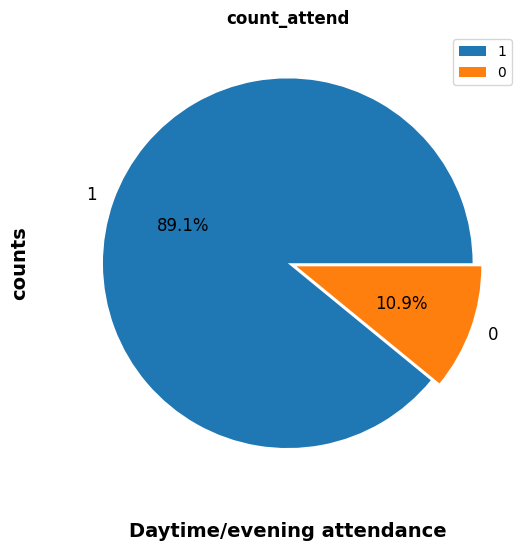

In [23]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
count_attend.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('count_attend',weight = "bold")
plt.xlabel('Daytime/evening attendance', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", fontsize = 14, labelpad = 20)
plt.legend(labels = count_attend.index, loc = "best")
plt.show()

<Axes: xlabel='Target', ylabel='count'>

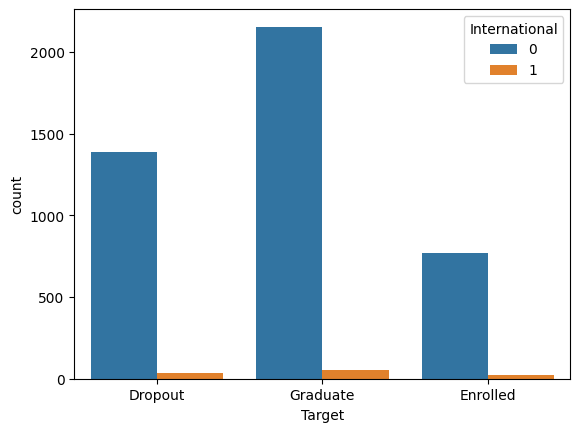

In [24]:
sns.countplot(df, x="Target", hue="International")

<Axes: xlabel='Target', ylabel='count'>

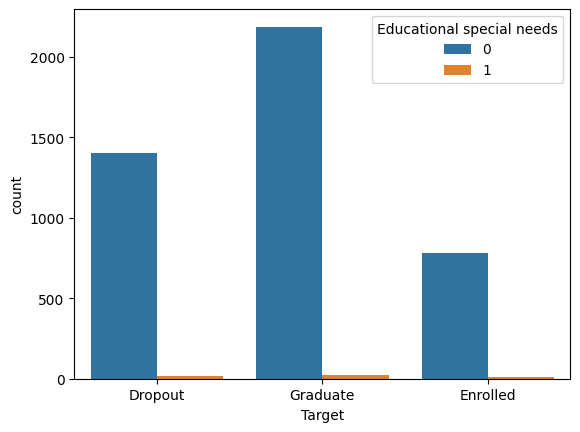

In [25]:
sns.countplot(df, x="Target", hue="Educational special needs")

<Axes: xlabel='Target', ylabel='count'>

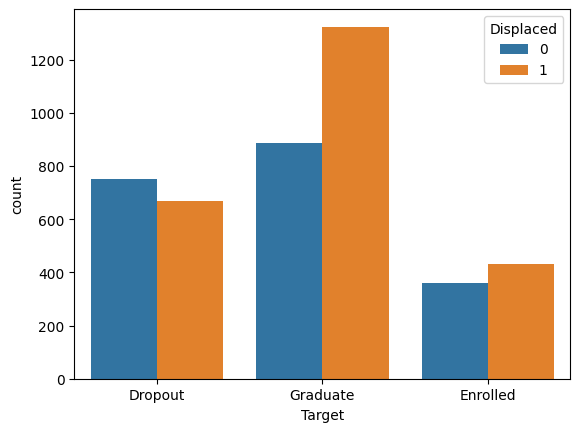

In [26]:
sns.countplot(df, x="Target", hue="Displaced")

<Axes: xlabel='Target', ylabel='count'>

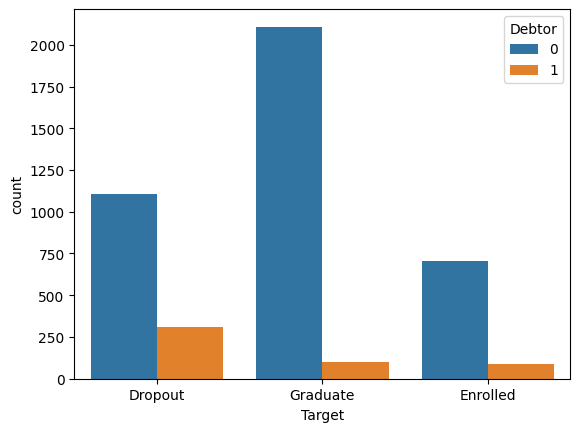

In [27]:
sns.countplot(df, x="Target", hue="Debtor")

<Axes: xlabel='Target', ylabel='count'>

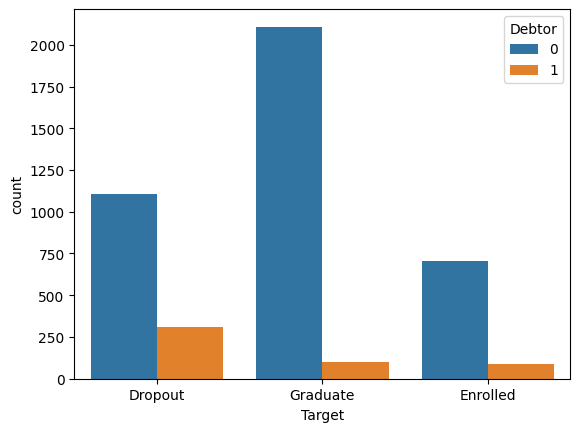

In [28]:
sns.countplot(df, x="Target", hue="Debtor")

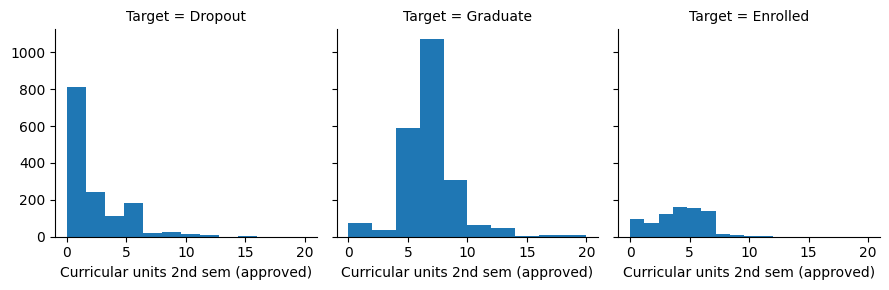

In [29]:
sns.FacetGrid(df,col='Target').map(plt.hist,'Curricular units 2nd sem (approved)')

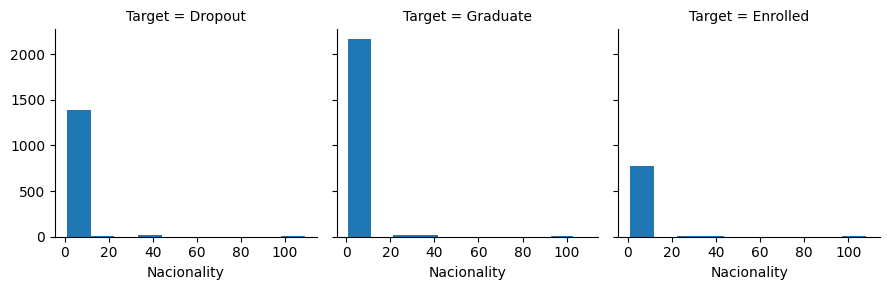

In [30]:
sns.FacetGrid(df,col='Target').map(plt.hist,'Nacionality')

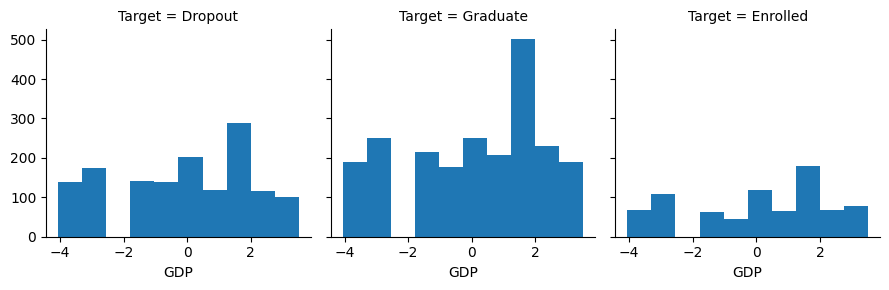

In [31]:
sns.FacetGrid(df,col='Target').map(plt.hist,'GDP')

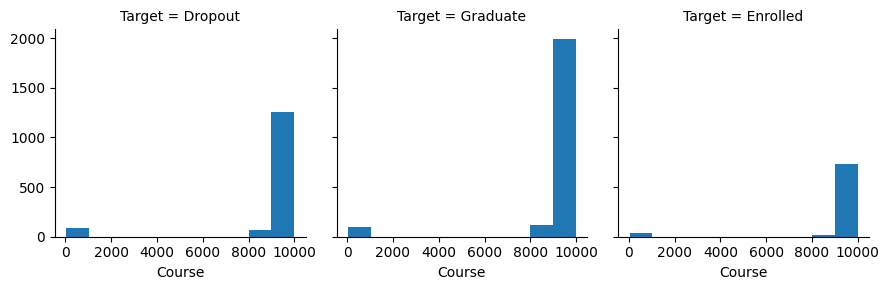

In [32]:
sns.FacetGrid(df,col='Target').map(plt.hist,'Course')

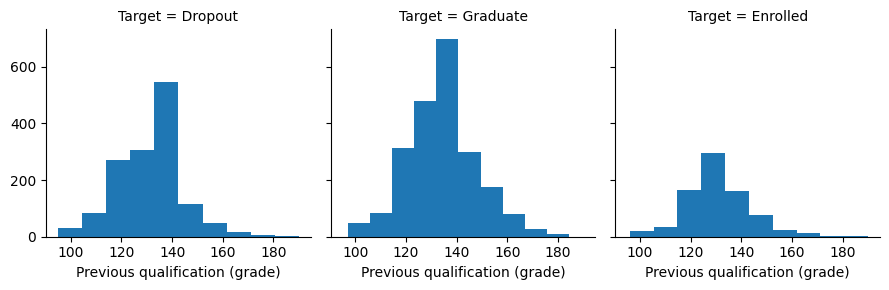

In [33]:
sns.FacetGrid(df,col='Target').map(plt.hist,'Previous qualification (grade)')

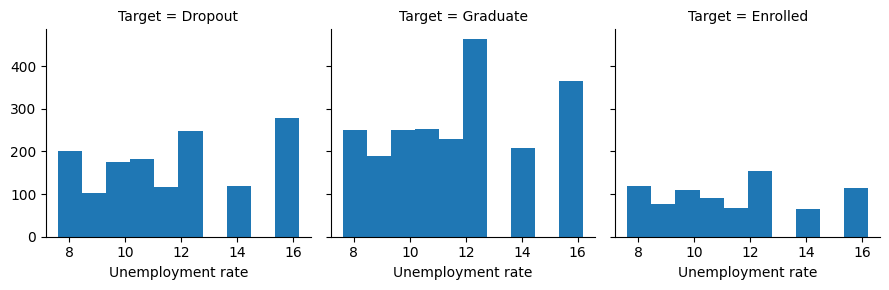

In [34]:
sns.FacetGrid(df,col='Target').map(plt.hist,'Unemployment rate')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Course', ylabel='Density'>

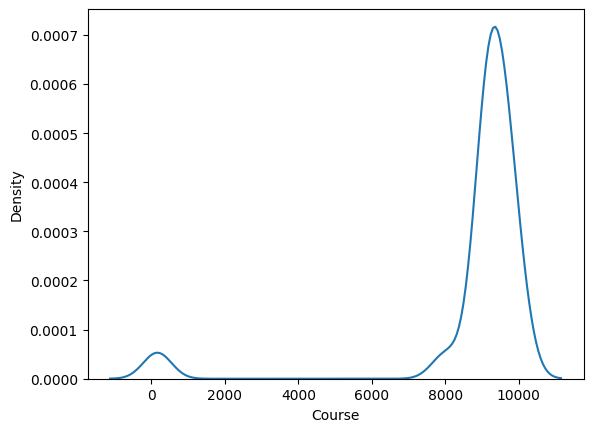

In [35]:
sns.kdeplot(data=df, x="Course")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Previous qualification (grade)', ylabel='Density'>

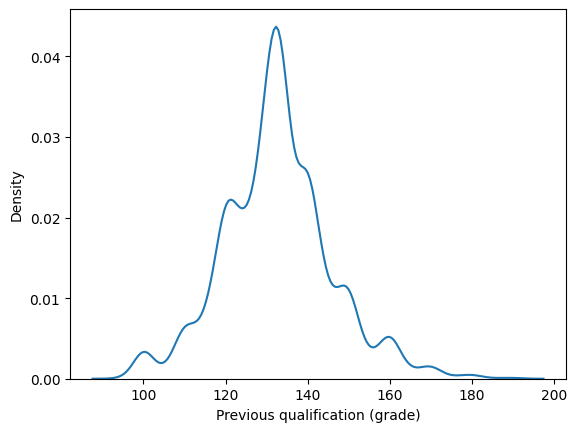

In [36]:
sns.kdeplot(data=df, x="Previous qualification (grade)")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Unemployment rate', ylabel='Density'>

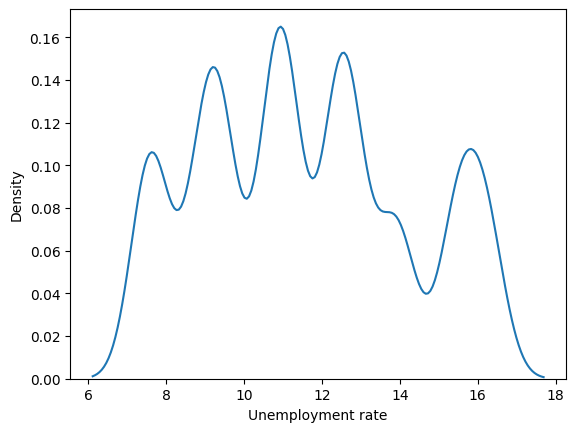

In [37]:
sns.kdeplot(data=df, x="Unemployment rate")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP', ylabel='Density'>

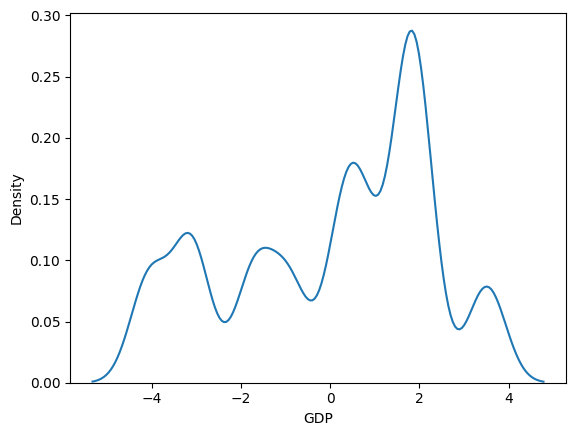

In [38]:
sns.kdeplot(data=df, x="GDP")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Inflation rate', ylabel='Density'>

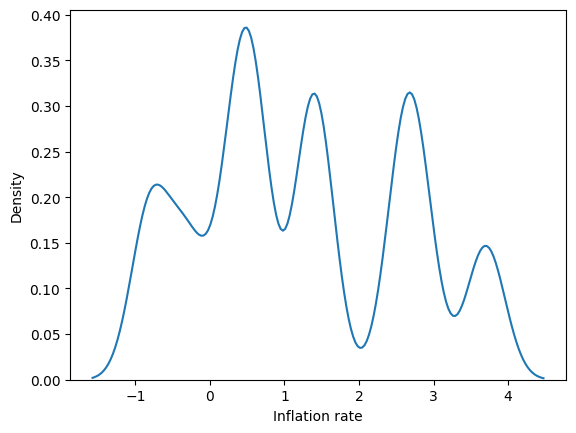

In [39]:
sns.kdeplot(data=df, x="Inflation rate")

In [40]:
def display_boxplots(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, len(num_cols) * 5))
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols), 1, i + 1)
        sns.boxplot(data=df[col], orient='h')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_23/211701019.py:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


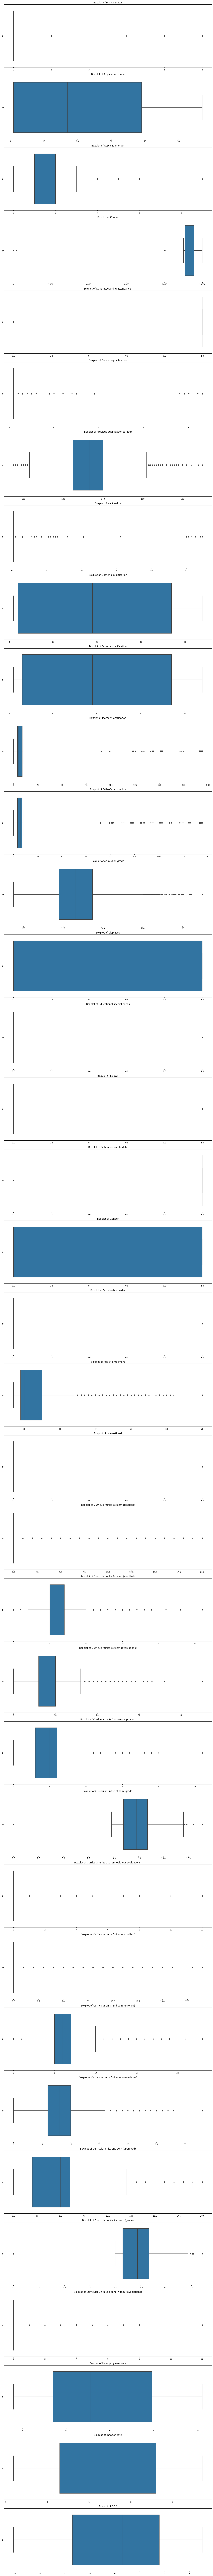

In [41]:
display_boxplots(df)

## **preprocessing**

/tmp/ipykernel_23/1398794492.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(['Dropout','Enrolled','Graduate'],[0,1,2])
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


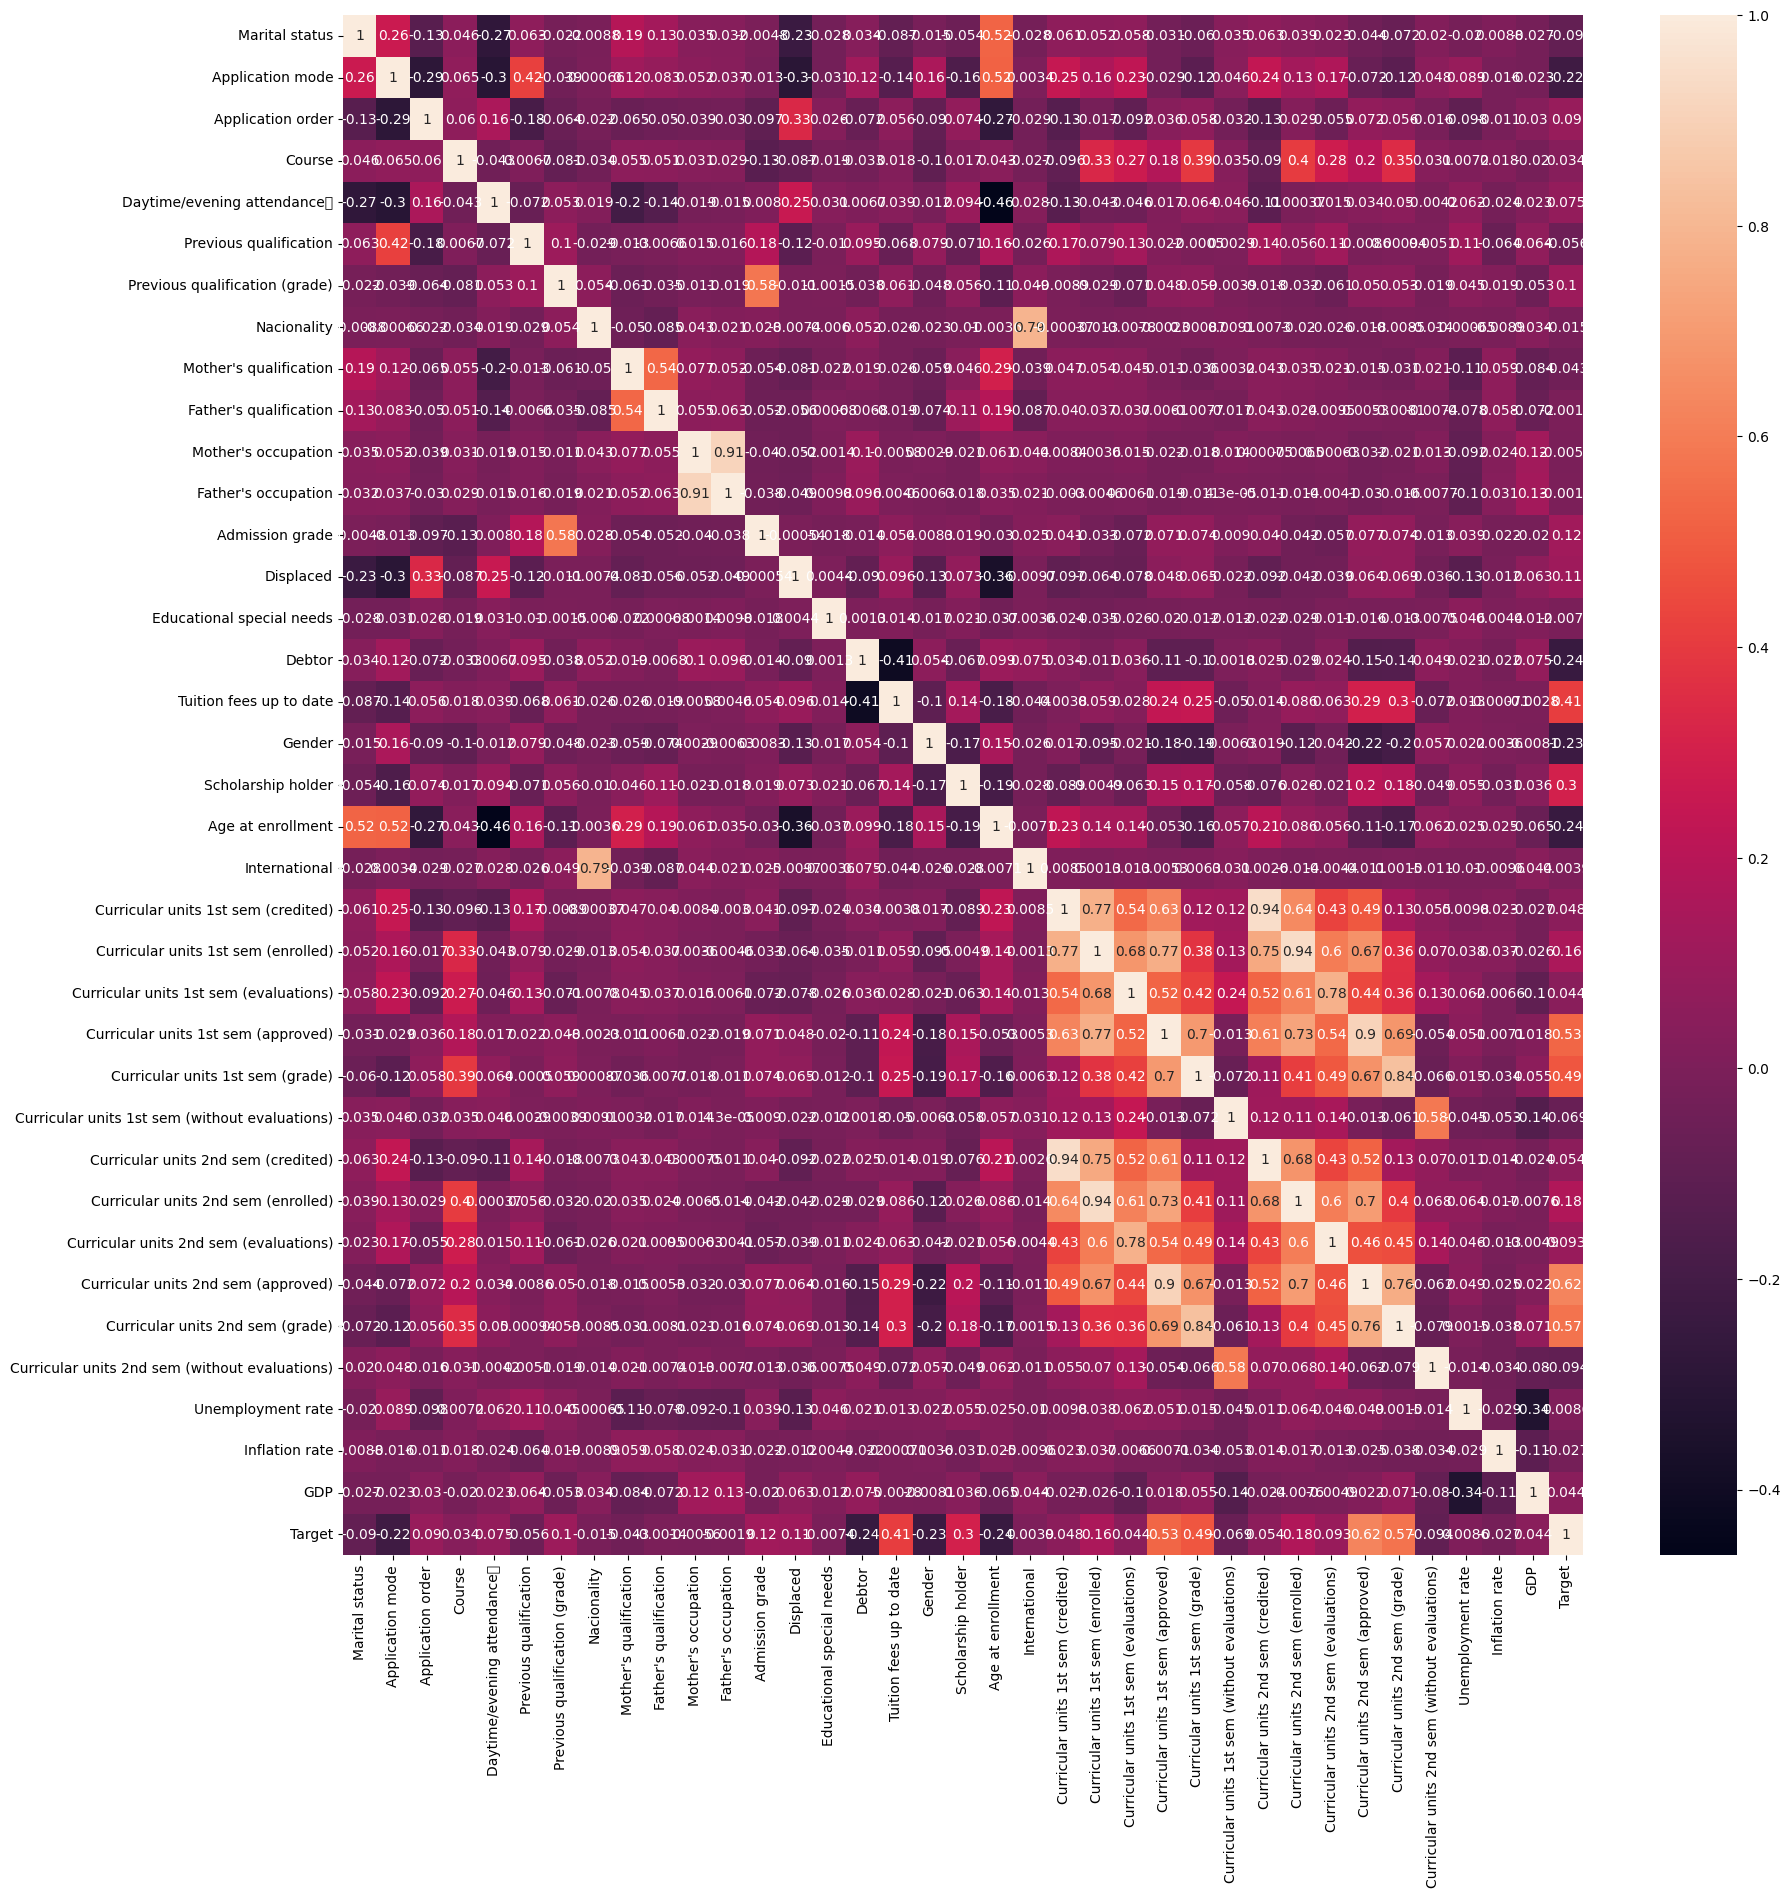

In [42]:
plt.figure(figsize=(20, 20))
df=df.replace(['Dropout','Enrolled','Graduate'],[0,1,2])
sns.heatmap(df.corr(), annot=True)
plt.show()

### remove outliers

In [43]:
drop_col=['Marital status','Application mode','Application order',"Father's occupation",
          "Mother's occupation","Father's qualification","Mother's qualification",
          "Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)",
         "Curricular units 1st sem (evaluations)","Curricular units 1st sem (without evaluations)",
          "Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)",
         "Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (without evaluations)",
         "Age at enrollment"]
df=df.drop(columns=drop_col)

In [44]:
def remove_outliers_iqr(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [45]:
clean_df=remove_outliers_iqr(df)

## Define features and Target

In [46]:
x=clean_df.drop(columns=['Target'])
y=clean_df['Target']

In [47]:
x.shape

(2170, 20)

In [48]:
y=y.values.reshape(-1,1)

In [49]:
y.shape

(2170, 1)

## scale to features

In [50]:
scaler=RobustScaler()
x=scaler.fit_transform(x)

## split data

In [51]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0,shuffle=True)

## Bulid Models

## 1- logisticRegression

In [52]:
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='l2', C=1.0)
lr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [53]:
lr.score(X_train,y_train)

0.7399605003291639

In [54]:
y_pre=lr.predict(X_test)

In [55]:
print(accuracy_score(y_test,y_pre))

0.7419354838709677


[[ 15  34  31]
 [  9  56  71]
 [  3  20 412]]


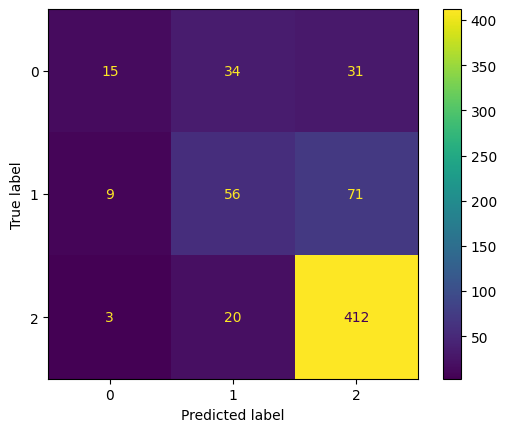

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pre)
print(confusion_matrix(y_test, y_pre))

In [57]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.56      0.19      0.28        80
           1       0.51      0.41      0.46       136
           2       0.80      0.95      0.87       435

    accuracy                           0.74       651
   macro avg       0.62      0.52      0.53       651
weighted avg       0.71      0.74      0.71       651



## 2-DecisionTree

In [58]:
dt=DecisionTreeClassifier(criterion='log_loss')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

In [59]:
dt.score(X_train,y_train)

1.0

In [60]:
y_pred=dt.predict(X_test)

In [61]:
print(accuracy_score(y_test,y_pred))

0.5975422427035331


[[ 24  26  30]
 [ 28  42  66]
 [ 44  68 323]]


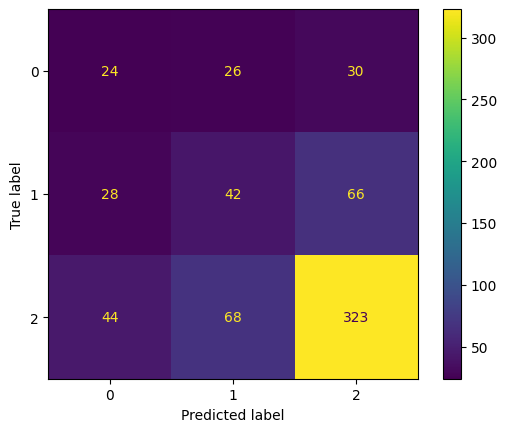

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [63]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.56      0.19      0.28        80
           1       0.51      0.41      0.46       136
           2       0.80      0.95      0.87       435

    accuracy                           0.74       651
   macro avg       0.62      0.52      0.53       651
weighted avg       0.71      0.74      0.71       651



## 3-SVM

In [64]:
svm = SVC()
svm.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [65]:
svm.score(X_train, y_train)

0.7807768268597761

In [66]:
y_pre1=svm.predict(X_test)

In [67]:
print(accuracy_score(y_test,y_pre1))

0.7511520737327189


[[ 16  29  35]
 [  5  55  76]
 [  0  17 418]]


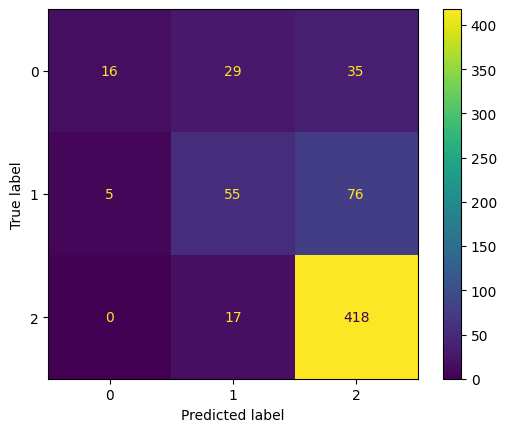

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pre1)
print(confusion_matrix(y_test, y_pre1))

In [69]:
print(classification_report(y_test, y_pre1))

              precision    recall  f1-score   support

           0       0.76      0.20      0.32        80
           1       0.54      0.40      0.46       136
           2       0.79      0.96      0.87       435

    accuracy                           0.75       651
   macro avg       0.70      0.52      0.55       651
weighted avg       0.74      0.75      0.72       651



## 4-KNN

In [70]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [71]:
knn.score(X_train,y_train)

1.0

In [72]:
pred=knn.predict(X_test)

In [73]:
print(accuracy_score(y_test,y_pred))

0.5975422427035331


[[ 27  28  25]
 [ 19  50  67]
 [ 12  31 392]]


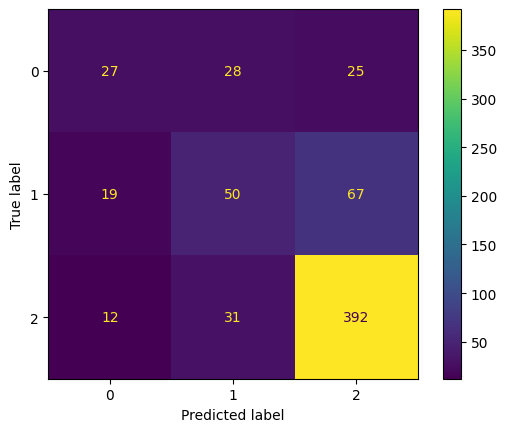

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)
print(confusion_matrix(y_test, pred))

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.47      0.34      0.39        80
           1       0.46      0.37      0.41       136
           2       0.81      0.90      0.85       435

    accuracy                           0.72       651
   macro avg       0.58      0.54      0.55       651
weighted avg       0.69      0.72      0.70       651



## 5-RandomForest

In [76]:
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train)

/tmp/ipykernel_23/2576472808.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf.fit(X_train,y_train)


RandomForestClassifier()

In [77]:
Rf.score(X_train,y_train)

1.0

In [78]:
ypred=Rf.predict(X_test)

In [79]:
print(accuracy_score(y_test,ypred))

0.7434715821812596


[[ 15  35  30]
 [ 11  56  69]
 [  1  21 413]]


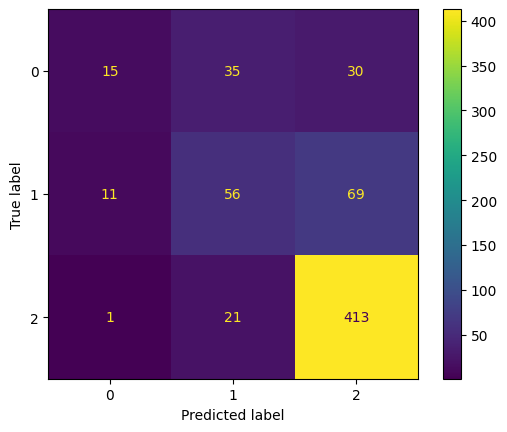

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
print(confusion_matrix(y_test, ypred))

In [81]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.56      0.19      0.28        80
           1       0.50      0.41      0.45       136
           2       0.81      0.95      0.87       435

    accuracy                           0.74       651
   macro avg       0.62      0.52      0.53       651
weighted avg       0.71      0.74      0.71       651

